<a href="https://colab.research.google.com/github/shxvaayy/OASIS-INFOBYTE/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
 columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
# Load the data
df = pd.read_csv('iris.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [ ]:

df.describe()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
count,151,151,151,151,151
unique,36,24,44,23,4
top,5.0,3.0,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


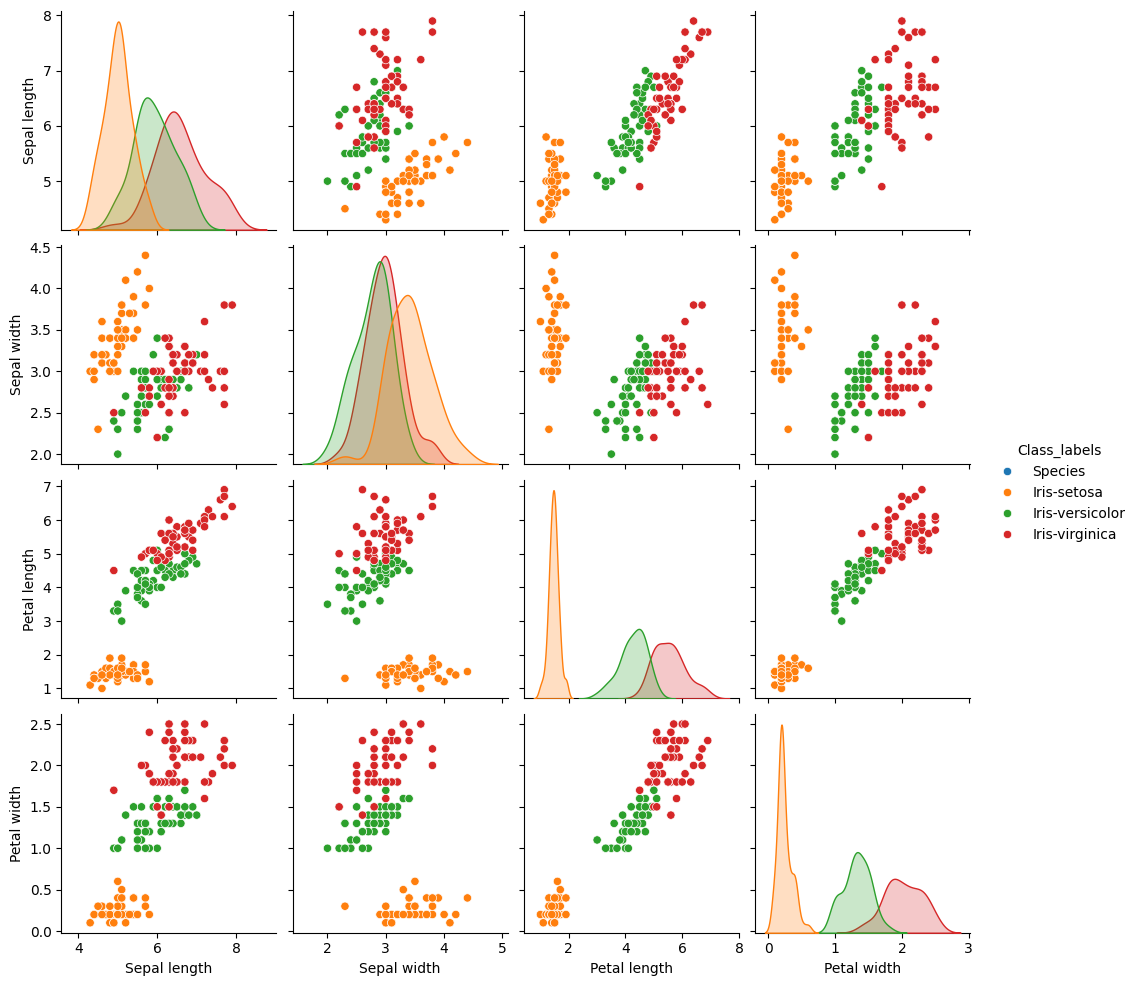

In [ ]:

for col in ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle potential errors during conversion

df.head()

df.describe()

sns.pairplot(df, hue='Class_labels')

In [ ]:
# Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [ ]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 4) # Reshape to (4,4) to accommodate 16 elements
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

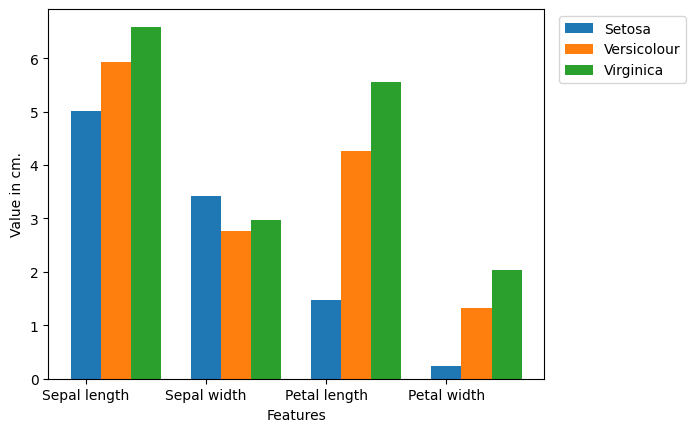

In [ ]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [ ]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
!pip install sklearn
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# ... (Your previous code to load and prepare data)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Now fit the SVC model
svn = SVC()
svn.fit(X_train_imputed, y_train)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


SVC()

In [ ]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31



In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [ ]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)